### Sanity checks:

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *

In [11]:
T = 200
I = 10   # number of locations
J = 5    # number of species
K = 3    # number of latent factors

In [12]:
lmbda = npr.randn(J,K)
alpha = npr.randn(J)
c = 0
phi = 0.5
logsigmasq = 0
x_0 = npr.randn(I,K)

theta = [alpha, lmbda, c, phi, logsigmasq]
Y, X = simulate_data(x_0, T, J, theta)

In [13]:
def f1(n_particles) :
    return block_pf(Y, x_0, n_particles, theta, calc_grad=True)
def f2(n_particles) :
    return bootstrap_PF_grad(x_0, n_particles, theta, Y, calc_grad=True)

n_particles = 1000
rep = 500

pool = mp.Pool(10)
results1 = pool.map(f1, [n_particles for n_particles in [n_particles]*rep])
results2 = pool.map(f2, [n_particles for n_particles in [n_particles]*rep])
pool.close()

logNC = np.zeros((rep,2))
alpha_grad = np.zeros((rep,2,J))
lmbda_grad = np.zeros((rep,2,J,K))
c_grad = np.zeros((rep,2))
phi_grad = np.zeros((rep,2))
logsigmasq_grad = np.zeros((rep,2))

for r in range(rep) :
    alpha_grad[r,0], lmbda_grad[r,0], c_grad[r,0], phi_grad[r,0], logsigmasq_grad[r,0] = results1[r][1][:]
    alpha_grad[r,1], lmbda_grad[r,1], c_grad[r,1], phi_grad[r,1], logsigmasq_grad[r,1] = results2[r][1][:]
    logNC[r,0], logNC[r,1] = results1[r][0], results2[r][0]

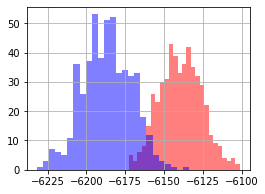

In [14]:
fig = plt.rcParams['figure.figsize'] = (4, 3)
plt.hist(logNC[:,0], bins=25, alpha=0.5, color="red")
plt.hist(logNC[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True);

In [15]:
print("Ratio of variances of gradients")
# print(np.std(alpha_grad,0))
print("For lambda :    ", np.round(np.var(lmbda_grad,0)[1]/np.var(lmbda_grad,0)[0],2))
print("For c :         ", np.round(np.var(c_grad,0)[1]/np.var(c_grad,0)[0],2))
print("For phi :       ", np.round(np.var(phi_grad,0)[1]/np.var(phi_grad,0)[0],2))
print("For logsigmasq :", np.round(np.var(logsigmasq_grad,0)[1]/np.var(logsigmasq_grad,0)[0],2))

Ratio of variances of gradients
For lambda :     [[5.91 7.34 8.71]
 [5.53 6.34 6.5 ]
 [6.63 6.97 7.91]
 [5.09 6.64 6.13]
 [5.24 5.41 5.7 ]]
For c :          2.38
For phi :        6.56
For logsigmasq : 3.26


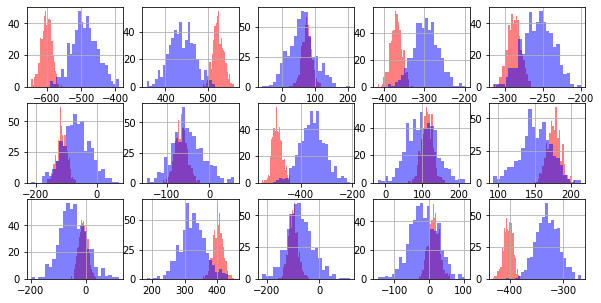

In [16]:
fig = plt.rcParams['figure.figsize'] = (10, 5)
for k in range(K) :
    for j in range(J) :
        idx = k*J + j + 1
        plt.subplot(K,J,idx)
        plt.hist(lmbda_grad[:,0,j,k], bins=25, alpha=0.5, color="red")
        plt.hist(lmbda_grad[:,1,j,k], bins=25, alpha=0.5, color="blue")
        plt.grid(True)

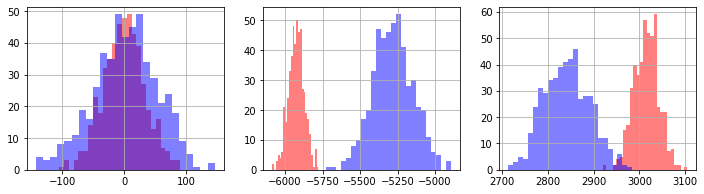

In [17]:
fig = plt.rcParams['figure.figsize'] = (12, 3)
plt.subplot(131)
plt.hist(c_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(c_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)
plt.subplot(132)
plt.hist(phi_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(phi_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)
plt.subplot(133)
plt.hist(logsigmasq_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(logsigmasq_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)